# K-Nearest Neighbors (KNN)
k-Nearest Neighbors (KNN) is a simple algorithm that can be used for both classification and regression. 
it is a non parametric model that can be used for both classification and regression.

In [2]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from warnings import filterwarnings

In [3]:
#load the dataset
df=sns.load_dataset('iris')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [5]:
# split the dataset into features and target
X = df.drop('species', axis=1)
y = df['species']

In [6]:
# load and fit the KNN model
from sklearn.neighbors import KNeighborsClassifier

# Create an instance of the KNN model
knn = KNeighborsClassifier( n_neighbors=5 ) # n_neighbors = 5 is types of data points to consider for prediction

# Fit the model to the data
knn.fit(X, y)

#predict the species for a new set of measurements
new_measurements=np.array([[5.1,3.5, 1.4, 0.2]])
knn.predict(new_measurements)

c:\Users\HP\miniconda3\envs\ml_python\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array(['setosa'], dtype=object)

In [7]:
#now split the dataset into train and test
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
# create the  KNN model
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier(n_neighbors=5) # n_neighbors = 5 is types of data points to consider for prediction

# fit the model
knn_model.fit(x_train, y_train)

KNeighborsClassifier()

 Confusion Matrix : 
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

 Classification Report :               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



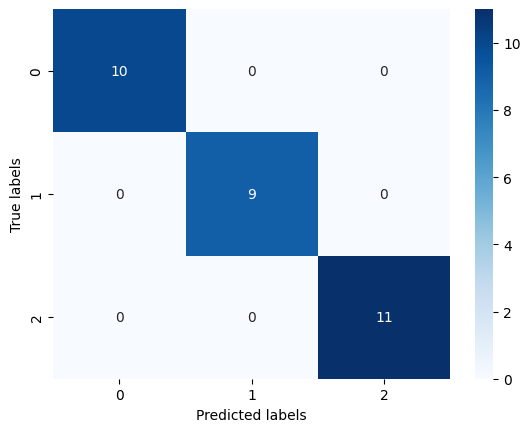

In [9]:
#predict the species the test data set
y_pred = knn_model.predict(x_test)

#evaluate the model
from sklearn.metrics import classification_report,confusion_matrix
print(' Confusion Matrix : \n',classification_report(y_test,y_pred))
print(' Classification Report :', classification_report(y_test, y_pred))

#plot the confusion matrix 
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()
      


# Regression KNN

In [10]:
#load tips using sns
import seaborn as sns

tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [11]:
#split the dataset into features and target
X = tips.drop('tip', axis=1)  # Features
y = tips['tip']  # Target

In [12]:
print(X)


     total_bill     sex smoker   day    time  size
0         16.99  Female     No   Sun  Dinner     2
1         10.34    Male     No   Sun  Dinner     3
2         21.01    Male     No   Sun  Dinner     3
3         23.68    Male     No   Sun  Dinner     2
4         24.59  Female     No   Sun  Dinner     4
..          ...     ...    ...   ...     ...   ...
239       29.03    Male     No   Sat  Dinner     3
240       27.18  Female    Yes   Sat  Dinner     2
241       22.67    Male    Yes   Sat  Dinner     2
242       17.82    Male     No   Sat  Dinner     2
243       18.78  Female     No  Thur  Dinner     2

[244 rows x 6 columns]


In [13]:
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


In [14]:
#encode the categorical columns using label encoding and for loop

from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

#encode categorical data to numerical using for loop
le=LabelEncoder()
for i in X.columns:
    if X[i].dtypes=='object' or X[i].dtypes=='category':
        X[i]=le.fit_transform(X[i])
X.head()

,total_bill,sex,smoker,day,time,size
0,16.99,0,0,2,0,2
1,10.34,1,0,2,0,3
2,21.01,1,0,2,0,3
3,23.68,1,0,2,0,2
4,24.59,0,0,2,0,4


In [15]:
for col in X.columns:
    if X[col].dtype == 'object' or X[col].dtype == 'Category'or X[col].dtype == 'bool':
        X[col]=le.fit_transform(X[col])

In [16]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [17]:
#split the dataset into train and test
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
#create the KNN model
from sklearn.neighbors import KNeighborsRegressor
knnr_model = KNeighborsRegressor(n_neighbors=5)

#fit the model
knnr_model.fit(x_train, y_train)

KNeighborsRegressor()

In [19]:
#predict the tip
y_pred = knnr_model.predict(x_test)

In [20]:
#evaluate the model
from sklearn.metrics import mean_squared_error

print('Mean Squared Error :', mean_squared_error(y_test, y_pred))

#r2 score
from sklearn.metrics import r2_score

r2 = r2_score(y_test, y_pred)
print('R2 Score:', r2)

# print RMSE
print('RMSE :', np.sqrt(mean_squared_error(y_test, y_pred)))


Mean Squared Error : 0.8382265306122448
R2 Score: 0.3294034029001649
RMSE : 0.9155471209130881


In [22]:
X.head()

,total_bill,sex,smoker,day,time,size
0,16.99,0,0,2,0,2
1,10.34,1,0,2,0,3
2,21.01,1,0,2,0,3
3,23.68,1,0,2,0,2
4,24.59,0,0,2,0,4


In [21]:
#now pridic a specific value
knnr_model.predict([[16.99,0,0,2,0,2]])

c:\Users\HP\miniconda3\envs\ml_python\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(


array([2.41])

In [27]:
#predict the tip 
knnr_model.predict([[99.99,1,1,10,1,2]])

c:\Users\HP\miniconda3\envs\ml_python\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(


array([6.346])